In [350]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy.stats import norm,chi2,t
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import f
import math
from  math import sqrt
warnings.filterwarnings('ignore')
from scipy.stats import sem
from statsmodels.stats.power import TTestIndPower

In [351]:
def MY_ZTEST(data,confi=95,pop_mean=4.5):
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    buff=[]
    for i in data:
        buff.append(i)
    buff=np.array(buff)
    #z_cal = np.sqrt( len(buff))*abs((pop_mean -  buff.mean())) /  buff.std()
    z_cal = np.sqrt( len(buff))*abs((pop_mean -  buff.mean())) / buff.std()
    print("Sample Mean",buff.mean())
    print("Sample std",buff.std())
    print("Confidence lavel:",confi/100)    
    
    alpha =(100-confi)/100
    print("Significance lavel:",alpha)
    alpha_2= alpha/2
    z = 1-alpha_2
    # retrieve value <= probability
    z_cri = norm.ppf(z)
    print("Z_cal",z_cal)
    print("z-critical:",z_cri)
    
    X = np.arange(-6, 6, 0.00001)
    Y = norm.pdf(X, loc=0, scale=1)
    plt.plot(X, Y)
    plt.title("Probability Distribution Function")
    plt.xlabel('X-Values')
    plt.ylabel('PDF(x)')
    plt.axvline(x = z_cri, color = 'r', label = 'axvline - full height')
    plt.axvline(x = z_cal, color = 'b', label = 'axvline - full height')
    #plt.text(-3, 0.25, r'z_crit=1.96', fontdict=font,color="r")
    #plt.text(-3, 0.35, r'z_cal=0.6122', fontdict=font,color="b")
    if z_cal>z_cri:
        print("There is enough evidence to reject Null Hypothesis")
    else:
        print("There is enough evidence not to reject Null Hypothesis (a.k.a Accept Null Hypothesis)")

In [352]:
from scipy.stats import sem
from scipy.stats import t
def One_Sample_Test(data1,pop_mean=4.5):

    buff=[]
    for i in data1:
        buff.append(i)
    buff=np.array(buff)
    df=buff.size-1
    print("degrees of freedom",df)
    cal =  abs(buff.size ** 0.5)*(pop_mean - buff.mean()) / (buff.std(ddof=1) )
    return cal,df

In [353]:
def Two_Sample_Test(data1,data2,confi=95):

    buff1=[]
    for i in data1:
        buff1.append(i)
    buff1=np.array(buff1)
    df1=buff1.size-1
    
    buff2=[]
    for i in data2:
        buff2.append(i)
    buff2=np.array(buff2)
    df2=buff2.size-1
    df=df1+df2
    var1=np.var(buff1)
    var2= np.var(buff2)
    mean1=np.mean(buff1)
    mean2=np.mean(buff2)
    mean_diff=abs(mean1-mean2)
    stan=np.sqrt(var1/df1 + var2/df2)
    cal=mean_diff/stan
    print("degrees of freedom",df)
    cal =cal=mean_diff/stan
    return cal,df

In [354]:
def Paired_Ttest(data1,data2,confi=95):
    buff1=[]
    for i in data1:
        buff1.append(i)
    buff1=np.array(buff1)
    df1=buff1.size
    
    buff2=[]
    for i in data2:
        buff2.append(i)
    buff2=np.array(buff2)
#    #t-paired test
    difference= buff1-buff2
    df=len( buff1)+len(buff2)-1
    cal=abs(df*(difference.mean()/difference.std()))
    return cal,df
    

In [355]:
def Chisquare_test(data1,data2,confi):

    buff1=[]
    for i in data1:
        buff1.append(i)
    buff1=np.array(buff1)
    l=len(buff1)
    df=l-1
    buff2=[]
    for i in data2:
        buff2.append(i)
    buff2=np.array(buff2)

    difference= buff1-buff2
    r= [i**2 for i in difference]
    chi_cal=sum([r[j]/Expected[j] for j in range(0,(l-1))] )
    alpha =(100-confi)/100
    l_value = chi2.ppf(alpha, df)
    h_value=chi2.ppf(1-alpha/2, df)
    null_hypothesis = bool(l_value <= chi_cal <= h_value)
    
    print("lower value:",l_value)
    print("Calculated chisquare:", chi_cal)
    print("higher value:",h_value)
    print("Calculated Chi-squae value in between critical lower and upper value:")
    print("Test result:", null_hypothesis)
   

In [356]:
#ANOVA1

In [357]:
from scipy.stats import f
DepartmentA = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
DepartmentB = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
DepartmentC = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]

data1,data2,data3=DepartmentA,DepartmentB,DepartmentC

def Anova_Oneway(data1,data2,data3,confi):
    data = pd.DataFrame({'DepartmentA':data1, 
                      'DepartmentB':data2, 
                      'DepartmentC':data3})
    cols=list(data.keys())
    #number of group
    n=len(cols)
    dfn=n-1
    dfd=data.shape[0]*data.shape[1]-n
    
    print(cols)
    df = pd.melt(data,  
              value_vars=cols)
    df.columns = [ 'Emploee', 'Salaries']

    df.sample(5)

    alpha =(100-confi)/100
    U_cri=f.ppf(1-alpha/2,dfn,dfd)
    L_cri=f.ppf(alpha/2,dfn,dfd)
    model = ols('Salaries~C(Emploee)', data=df).fit()
    f_val=model.fvalue
    print("fvalue",f_val)
   
    #print(model.summary() )
    comparison = MultiComparison(df['Salaries'], df['Emploee'])
    tukey = comparison.tukeyhsd(alpha)
    print(tukey.summary())

    x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
    plt.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
    x_cri=f.ppf(alpha/2,dfn,dfd)
    plt.axvline(x=U_cri, label='Upper F Critical value', color='r')
    plt.axvline(x=L_cri, label='Lower F Critical value', color='g')
    plt.axvline(x=f_val, label='F-score')
    plt.legend()
    

In [358]:
#ANOVA2

In [359]:
import itertools
def Anova2(data,interaction=1):
    keys=data.keys()
    ll=len(data[keys[0]].index[0])+ len(data[keys[1]].index[1])
   
    G33=[]
    for keys in data.keys():
        for j in range(0,data.shape[0]):
            G33.append(data[keys][data.index[j]])
        
    G33=np.array(G33)
    G33.reshape(G33.shape[1]*G33.shape[0],)
    
    
    #ll=len(data[keys[0]].Male)+ len(data[keys[0]].Female)
    G22=[list(itertools.repeat(keys,ll)) for keys in data.keys()]
    G22=np.array(G22)
    G22=G22.reshape(G22.shape[1]*G22.shape[0],)
    
    G11=[]
    keys_len=len(data.keys())
    indexx=data.index.shape

    for _ in range(0,keys_len):
        for j in range(0,indexx[0]):
            G11.append(int(ll/2)*([data.index[j]]))
            
    G11=np.array(G11)
    G11=G11.reshape(G11.shape[1]*G11.shape[0],)
    #G22=np.array(G22).reshape(30,)
    #G33=np.array(G33).reshape(30,)
    G33=G33.reshape(G33.shape[1]*G33.shape[0],)
    dicn= {"Gender":G11,"Department":G22,"Salary":G33}
    df=pd.DataFrame(dicn)
    #print(df)
    #perform two-way ANOVA
    if interaction==1:
        model = ols('Salary ~ C(Gender) + C(Department) + C(Gender):C(Department)', data=df).fit()
        return(sm.stats.anova_lm(model, typ=2))
    else:
        model = ols('Salary ~ C(Gender) + C(Department)', data=df).fit()
        return(sm.stats.anova_lm(model, typ=2))
        
    print("------------------------")
    #return result



In [360]:
def Display(cal,df,confi,test):
    font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
    
    if test=="one_sample_Test"or "Two_Sample_Test" or "Paired_Test":
        alpha =(100-confi)/100
        print("Significance lavel:",alpha)
        alpha_2= alpha/2

        cri = abs(t.ppf(alpha_2,df))
        print("t_cal",abs(cal))
        print("t-critical:",cri)
        x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
        plt.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')
    
        plt.title("Probability t Distribution Function")
        plt.xlabel('X-Values')
        plt.ylabel('PDF(x)')
        plt.axvline(x = abs(cri), color = 'r', label = 'Critical value')
        plt.axvline(x = abs(cal), color = 'b', label = 'Calculated value')
        # Function add a legend  
        #plt.legend(["blue", "green"], loc ="lower right")
        plt.legend()
  

    else:
        print("not recognizing")
       
       
    if abs(cal)>abs(cri):
        print("There is enough evidence to reject Null Hypothesis")
    else:
        print("There is enough evidence not to reject Null Hypothesis (a.k.a Accept Null Hypothesis)")
    

In [361]:

def All_test(data1,data2=None,data3=None,confi=95,pop_mean=5,test="one_sample_Test"):
    if test=="one_sample_Test":
        cal,df=One_Sample_Test(data1,pop_mean)
        Display(cal,df,confi,test)
    elif test=="Two_Sample_Test":
        cal,df=Two_Sample_Test(data1,data2,confi=95)
        Display(cal,df,confi,test)
    elif test=="Paired_Test":
        cal,df=Paired_Ttest(data1,data2,confi=95)
        Display(cal,df,confi,test)
    elif test== "Z_test":
        MY_ZTEST(data1,confi=95,pop_mean=5)
    elif test=="Chi_Test":
        Chisquare_test(data1,data2,confi=95)
    elif test=="Anova_Oneway":
        Anova_Oneway(data1,data2,data3,confi)
    elif test=="Anova2":
        return(Anova2(data,interaction=1))
        
        
    else:
        pass
    #elif test=="Two_Sample_Test":
        #cal,df=Two_Sample_Test(*data1,*data2,pop_mean)(*data1,pop_mean)
        

In [362]:
def normality_test(x,alpha):
    k2, p = stats.normaltest(x)
    print("Alpha:",alpha)
    print("p value:",p)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Sample comes from a normal distribution")
    else:
        print("Sample may not come from a normal distribution")
    

# Z-TEST

Suppose we are testing a new model of cell-phone and want to compare its bandwidth to the
previous model.
Sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428, 4.533,
4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232,
5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482,
4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554,
4.42 , 5. , 5.126, 5.082, 4.944, 4.658]
● State the null and alternative hypotheses.
● Use the Z-test to determine whether the new model has a significantly different bandwidth 4.5 GHz from the previous model with a standard deviation of 0.6 GHz, using a significance level of 0.05.
● Interpret the results


In [365]:
#TEST
Sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428, 4.533,
4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232,
5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482,
4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554,
4.42 , 5. , 5.126, 5.082, 4.944, 4.658]

In [366]:
normality_test(Sample,0.05)

Alpha: 0.05
p value: 0.3107607979206278
Sample may not come from a normal distribution


Sample Mean 4.743942307692307
Sample std 0.3254858742924266
Confidence lavel: 0.95
Significance lavel: 0.05
Z_cal 5.672929070113261
z-critical: 1.959963984540054
There is enough evidence to reject Null Hypothesis


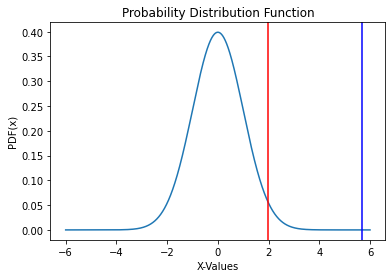

In [367]:
data1=ZSample
All_test(data1,data2=None,data3=None,confi=95,pop_mean=4.5,test="Z_test")

In [368]:
#INTERPRETATION

# One Sample T-test

One sample T-test: Suppose we have a new manufacturing process for producing aluminum cans, and we want to test whether the mean weight of the cans produced using this new process is significantly different from the target
weight of 15 grams. We randomly sample 30 cans produced using the new process and measure their weights in grams. We obtain the following data:

Sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9,
14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1,
15.3, 15.1, 15.0, 14.8, 15.2, 15.0]
● State the null and alternative hypotheses.
● Use the appropriate T-test to determine whether the mean weight of theproduced cans is equal to the targetweight   of 15 grams, using a significance level of 0.05.
● Interpret the results


In [369]:
Sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9,14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1,15.3, 15.1, 15.0, 14.8, 15.2, 15.0]
normality_test(Sample,0.05)



Alpha: 0.05
p value: 0.26673475177866685
Sample may not come from a normal distribution


degrees of freedom 29
Significance lavel: 0.05
t_cal 1.266102316314493
t-critical: 2.0452296421327034
There is enough evidence not to reject Null Hypothesis (a.k.a Accept Null Hypothesis)


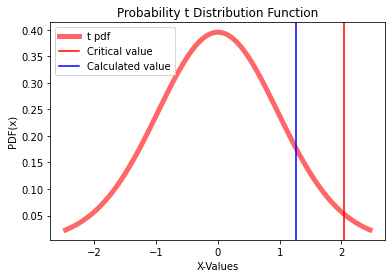

In [370]:
All_test(data1=Sample,data2=None,data3=None,confi=95,pop_mean=15,test="one_sample_Test")

# Two-Sample T-test

Two Sample T-test: Suppose a food company has developed a new flavor of potato chips and wants to compare it to the current best-selling flavor. The company randomly selects two groups of 20 customers each. The first group is
given the new flavor of potato chips, while the second group is given the best-selling flavor. After trying the potato chips, each customer rates the flavor on a scale of 1 to 10. The following are the flavor ratings for the 

two groups:
New flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
Best selling flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]

● State the null and alternative hypotheses.
● Use the appropriate T-test to determine whether there is a significant difference between the two groups or not, using a significance level of 0.05.
● Interpret the results




degrees of freedom 38
Significance lavel: 0.05
t_cal 2.6626213096882503
t-critical: 2.0243941645751367
There is enough evidence to reject Null Hypothesis


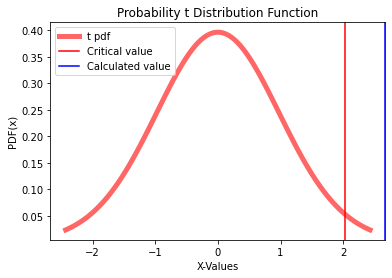

In [371]:
test="Two_Sample_Test"
New_flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
Best_selling_flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]
All_test(data1=New_flavor,data2=Best_selling_flavor,data3=None,confi=95,pop_mean=15,test=test)

In [372]:
# t-test and data and hypothesis two-sample

# Paired T-test

Suppose a company wants to evaluate a new training program for its employees. The company selects 20 employees and measures their productivity before and after the training program. The following are the productivity scores (number of tasks completed per hour) for each employee before and after the training:

Before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16,
13, 15, 12]
After = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18,
15, 17, 14]

-State the null and alternative hypotheses.
-Use the appropriate T-test to determine whether the new training program has had an effect on employee productivity, with a significance level of 0.05.

Significance lavel: 0.05
t_cal 191.06019993708787
t-critical: 2.0226909117347285
There is enough evidence to reject Null Hypothesis


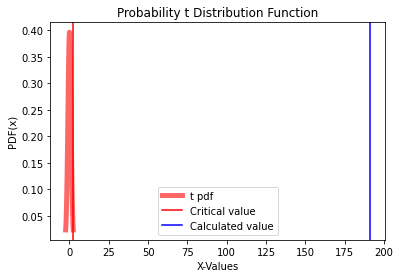

In [373]:
test="Paired_Test"
Before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16,
13, 15, 12]
After = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18,
15, 17, 14]

All_test(data1=Before,data2=After,data3=None,confi=95,pop_mean=15,test=test)

# ANOVA Test: Oneway

Suppose a company has three departments (A, B, and C) and wants to test whether there is a significant difference in salaries between the departments. The company selects 10 employees randomly from each
department and records their salaries.

Department A = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
Department B = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
Department C = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]

● State the null and alternative hypotheses.
● Use One-Way ANOVA-test to determine whether there is a significant
  difference in salaries between the three departments.
● Interpret the results


['DepartmentA', 'DepartmentB', 'DepartmentC']
fvalue 37.681818181818166
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
DepartmentA DepartmentB     -7.2    0.0 -10.6236 -3.7764   True
DepartmentA DepartmentC    -11.9    0.0 -15.3236 -8.4764   True
DepartmentB DepartmentC     -4.7 0.0057  -8.1236 -1.2764   True
---------------------------------------------------------------


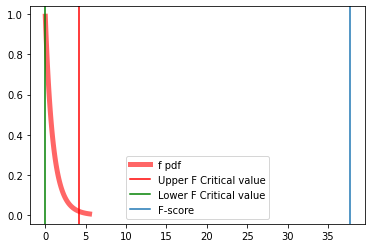

In [374]:
test="Anova_Oneway"
Department_A = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
Department_B = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
Department_C = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]
All_test(data1=Department_A,data2=Department_B,data3=Department_C,confi=95,pop_mean=None,test=test)

# ANOVA Test: Two-way

Suppose a company has three departments (A, B, and C) and wants to test whether there is a significant difference in salaries between the departments, while also considering the effect of gender. The company selects
10 employees randomly from each department and records their salaries and gender.

Department A:
Male: [$55k, $60k, $50k, $58k, $63k]
Female: [$62k, $57k, $56k, $61k, $59k]

Department B:
Male: [$50k, $52k, $48k, $49k, $55k]
Female: [$53k, $51k, $54k, $47k, $50k]

Department C:
Male: [$45k, $43k, $48k, $50k, $42k]
Female: $47k, $49k, $46k, $44k, $48k]

● State the null and alternative hypotheses.
● Use Two-Way ANOVA-test to determine whether there is a significant
  difference in salaries between the three departments.
● Interpret the results


In [376]:
mydict={"DepartmentA":{"Male": [55, 60,50, 58, 63],
     "Female":  [62, 57, 56, 61, 59]},
"DepartmentB":{"Male": [50, 52, 48,49, 55],
     "Female": [53, 51, 54, 47, 50]},
"DepartmentC":{"Male":[45, 43, 48, 50, 42],
     "Female": [47, 49, 46, 44, 48]}}
data=pd.DataFrame(mydict)
data


,DepartmentA,DepartmentB,DepartmentC
Male,"[55, 60, 50, 58, 63]","[50, 52, 48, 49, 55]","[45, 43, 48, 50, 42]"
Female,"[62, 57, 56, 61, 59]","[53, 51, 54, 47, 50]","[47, 49, 46, 44, 48]"


### Anova-twoway with interaction between factors

In [377]:
test="Anova2"
All_test(data1=data,test=test)

sum_sq    df          F        PR(>F)
C(Gender)                  8.533333   1.0   0.833876  3.702368e-01
C(Department)            718.466667   2.0  35.104235  7.472321e-08
C(Gender):C(Department)    3.266667   2.0   0.159609  8.533743e-01
Residual                 245.600000  24.0        NaN           NaN

limit_output extension: Maximum message size of 1000 exceeded with 1038 characters

### Anova-twoway without interaction between factors

In [378]:
Anova2(data,interaction=0)

,sum_sq,df,F,PR(>F)
C(Gender),8.533333,1.0,0.891508,3.537611e-01
C(Department),718.466667,2.0,37.530405,2.163105e-08
Residual,248.866667,26.0,NaN,NaN


# A/B testing

A/B testing: Suppose a company has launched a new flavor of soda and wants to test if it has a higher preference than the old flavor. The company conducts a survey with a sample of 30 customers, randomly split into two groups of 15. One group is given the old flavor of soda and the other group is given the new flavor of soda. Each participant rates their preference on a scale of 1 to 10.

Old Flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5],
New Flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]

● State the null and alternative hypotheses.
● difference in preference between the old and new flavors of soda, with a significance level of 0.05
● Interpret the results


In [380]:
test="Two_Sample_Test"
Old_Flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5]
New_Flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]

t_value,df=Two_Sample_Test(Old_Flavor,New_Flavor,95)

alpha = 0.05
t_critical_value = stats.t.ppf(1 - (alpha/2), 53)
null_hypothesis = bool(t_critical_value >= t_value >= -t_critical_value)
print("t calculated value",t_value)
print("t critical value",t_critical_value)
if t_critical_value>t_value:
    print("Null Hypothesis is True")
else:
    print("Null Hypothesis is False")

degrees of freedom 28
t calculated value 3.815929867636064
t critical value 2.0057459935369497
Null Hypothesis is False


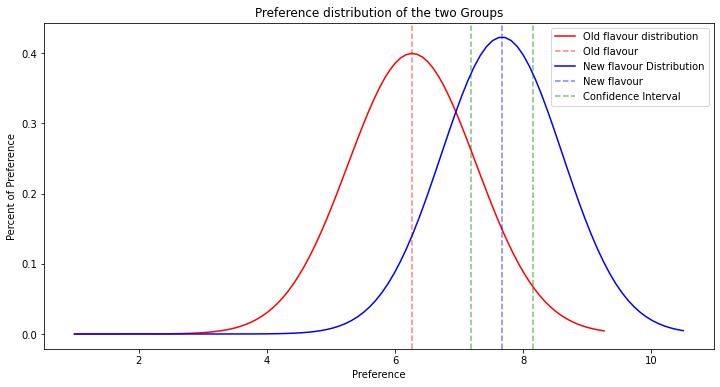

In [381]:
data1,data2=Old_Flavor,New_Flavor
s = np.std(data2)
x = np.mean(data2)
n = len(data2)
rho = (t_critical_value * s) / np.sqrt(n)
conf_int = x - rho, x + rho
# Effect size based on Cohen’s d formula.
from statsmodels.stats.power import TTestIndPower
x1 = np.mean(data1)
x2 = np.mean(data2)
s1 = np.std(data1)
s2 = np.std(data2)
n1 = len(data1)
n2 = len(data2)

s = np.sqrt((((n1 - 1) * (s1 ** 2)) + ((n2 - 1) * (s2 ** 2))) / (n1 + n2 - 2))
effect = np.abs((x1 - x2) / s)

power = TTestIndPower().power(effect, nobs1=n1, ratio=n2 / n1, df=(n1 + n2 - 2), alpha=alpha)

import matplotlib.pyplot as plt

# Control
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(1, x1 + 3*s1, 100)
yA = stats.norm(loc=x1, scale=s1).pdf(xA)
ax.plot(xA, yA, c='red', label='Old flavour distribution')
ax.axvline(x=x1, c='red', alpha=0.5, linestyle='--', label='Old flavour')

# Experimental
xB = np.linspace(1, x2 + 3*s2, 100)
yB = stats.norm(loc=x2, scale=s2).pdf(xB) 
ax.plot(xB, yB, c='blue', label='New flavour Distribution')
ax.axvline(x=x2, c='blue', alpha=0.5, linestyle='--', label='New flavour')

# Confidence interval
ax.axvline(conf_int[0], c='green', linestyle='--', alpha=0.5)
ax.axvline(conf_int[1], c='green', linestyle='--', alpha=0.5, label='Confidence Interval')

plt.xlabel('Preference')
plt.ylabel('Percent of Preference')
plt.title('Preference distribution of the two Groups')
plt.legend()
plt.show()

# Chi_square

Chi-Square: Suppose we have a hypothesis that a six-sided die is fair, with each side
having an equal probability of landing face up. We roll the die 100 times and record the
number of times each side appears:
Side Observed Frequency
1 18
2 20
3 16
4 22
5 14
6 10
Given that the expected probabilities are equal to 1/6, Use the class CHi-Square to
estimate the goodness-of-fit through chi-square test to determine whether the observed
frequencies are consistent with the expected frequencies under the null hypothesis of a
fair die.

In [382]:
Expected = np.array([100*1/6, 100*1/6, 100*1/6,100*1/6, 100*1/6, 100*1/6])
Observed = np.array([18,20,16,22,14,10])
data1,data2= Expected,Observed 

In [383]:
All_test(data1,data2,confi=95,pop_mean=5,test="Chi_Test")

lower value: 1.1454762260617692
Calculated chisquare: 2.9333333333333322
higher value: 12.832501994030027
Calculated Chi-squae value in between critical lower and upper value:
Test result: True


# Extra Anova-Oneway Calculation

In [384]:
def Anova1_Calculated(df,confi):
    dfn=df.shape[1]-1
    dfd=df.shape[0]*df.shape[1]-df.shape[1]
    means=[i for i in df.mean()]
    grand_mean= sum(means)/len(means)
    SSB=sum([df.shape[0]*(grand_mean-mean)**2 for mean in means])
    MSB= SSB/dfn
    df_array=np.array(df)
    means=np.array(means)
    buff=[]
    for i in range(0,df.shape[1]):
        buff.append(means[i]-df_array[:,i])
        SSW=sum(sum(np.array(buff)**2))
        MSW= SSW/dfd
    
    F=MSB/MSW
    
    alpha =(100-confi)/100
    print("F-score:",F)
    U_cri=f.ppf(1-alpha/2,dfn,dfd)
    L_cri=f.ppf(alpha/2,dfn,dfd)
    
    x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
    plt.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
    plt.axvline(x=U_cri, label='Upper Critical value', color='g')
    plt.axvline(x=L_cri, label='Lower Critical value ', color='g')
    plt.axvline(x=F, label='F-score')
    plt.legend()
    #U_cri
    

In [385]:
a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]
#DepartmentA = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
#DepartmentB = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
#DepartmentC = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]
#a,b,c=DepartmentA,DepartmentB,DepartmentC
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples)




F-score: 0.23489932885906037


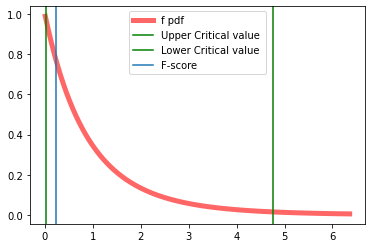

In [386]:
Anova1_Calculated(df,95)

In [387]:
#Anova one-way regression approach

['DepartmentA', 'DepartmentB', 'DepartmentC']
fvalue 0.23489932885905945
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
DepartmentA DepartmentB      1.5 0.7824 -4.2887 7.2887  False
DepartmentA DepartmentC      1.0 0.8957 -4.7887 6.7887  False
DepartmentB DepartmentC     -0.5 0.9727 -6.2887 5.2887  False
-------------------------------------------------------------


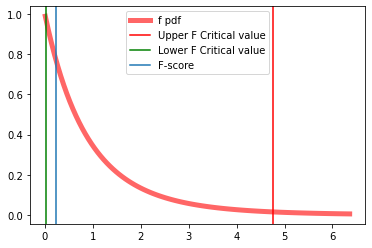

In [388]:
All_test(data1=a,data2=b,data3=c,confi=95,pop_mean=None,test="Anova_Oneway")